# Q1.a.  (10 points) create an network to approximate sin(x)

In this problem, you will try to build a three-layer fully connected network to approximate the sin function using PyTorch. There are 100 hidden units in each layer and please use ReLU activation after the first two layers and no activation after the last layer. You should implement your network model as a subclass of [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)

### <font color='red'>Define your network here</font>

In [7]:
import torch
from torch import nn
import numpy as np
import random

class Mynetwork(torch.nn.Module):
    def __init__(self):
        super(Mynetwork, self).__init__()
        #-- complete the code here
        self.fc1 = nn.Linear(1, 100)   # first layer: input -> 100 units
        self.fc2 = nn.Linear(100, 100) # second layer: 100 units -> 100 units
        self.fc3 = nn.Linear(100, 1)   # third layer: 100 units -> output
        self.relu = nn.ReLU()
        #-- end complete the code here

    def forward(self, x):
        #-- complete the code here
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
        #-- end complete the code here


### Training

In [5]:
model = Mynetwork()

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(10000):
    x=10. * torch.rand((200,1)).type(torch.FloatTensor)
    y=torch.sin(x).view(-1)

    optimizer.zero_grad()
    yh = model(x).view(-1)
    loss = loss_fn(yh,y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 999:
        print(loss.item())

0.07185713946819305
0.0025101557839661837
0.0011976024834439158
0.0006762168486602604
0.0008175031980499625
0.0008943544235080481
0.0005814802134409547
0.0005925407167524099
0.00017542506975587457
0.00030127185164019465


### Visualization

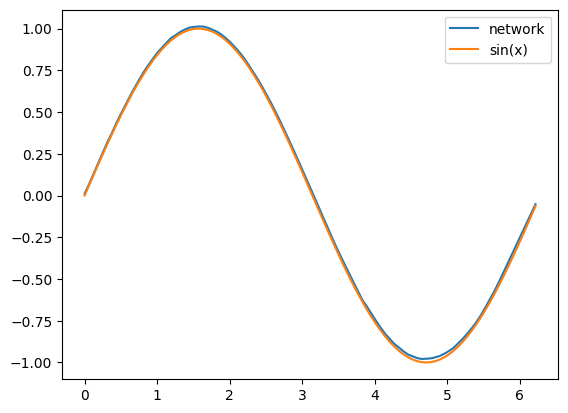

In [8]:
from matplotlib import pyplot as plt

xv=np.array(range(100))/50. *np.pi
yv=model(torch.from_numpy(xv).type(torch.FloatTensor).view((100,-1))).view(-1).detach().numpy()

plt.plot(xv,yv,label='network')
plt.plot(xv,np.sin(xv),label='sin(x)')
plt.legend()

# Q1.b. (Extra credit: 5 points) Repeat 1.a. using [torch.nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

### <font color='red'>Redefine your model below</font>

In [6]:
import torch
from torch import nn

class Mynetwork(nn.Module):
    def __init__(self):
        super(Mynetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        return self.model(x)


### Training

In [9]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(10000):
    x=10. * torch.rand((200,1)).type(torch.FloatTensor)
    y=torch.sin(x).view(-1)

    optimizer.zero_grad()
    yh = model(x).view(-1)
    loss = loss_fn(yh,y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 999:
        print(loss.item())

0.0002643131883814931
0.0004368436348158866
0.0008413459290750325
0.0018046987242996693
0.0005272765411064029
0.0001875417510746047
0.0006165400263853371
0.0008865981362760067
0.000667335232719779
0.0001944328105309978


### Visualization

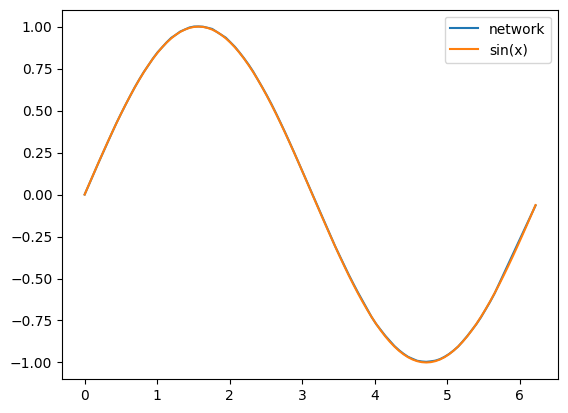

In [10]:
from matplotlib import pyplot as plt

xv=np.array(range(100))/50. *np.pi
yv=model(torch.from_numpy(xv).type(torch.FloatTensor).view((100,-1))).view(-1).detach().numpy()

plt.plot(xv,yv,label='network')
plt.plot(xv,np.sin(xv),label='sin(x)')
plt.legend()

# Q2. Classify clothing

In this problem, you will implement a network to classify different types of clothing. We will play with the [FachionMNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which contains ten different classes.

Your network should contain three conv layers with 6, 16, and 32 filters (all 3x3 and no padding), respectively. You should use ReLU activation after each conv layer followed by 2x2 max pooling. There will be two fully connected layers after the last pooling layer. The first fully connected layer has 64 neurons.

# Q2.a. (2 points) How many outputs for the last fully connected layer (Hint: there are 10 classes)

<font color='red'>Answer: </font>

# Q2.b (6 points) How many parameters in the entire network?

<font color='red'>Answer: </font>
    
conv 1: (6 filters)(1 input channel)(3x3) + (6 biases) = 6x9+6 = 60

pooling 1: no parameters

conv2: (16 filters)(6 input channels)(3x3) + (16 biases) = 16x54+16 = 880

pooling 2:no parameters

conv3: (32 filters)(16 input channels)(3x3) + (32 biases) = 32x144+32 = 4640

pooling 3:no parameters

fully-connected 1:  32 channels * 2x2 = 128 and (128x64)+64 = 8256

fully-connected 2: (64x10)+10 = 650

Total = 60+880+4640+8256+650 = 14486 parameters



# Q2.c (12 points) Complete the code below by defining the network

### Download and load the dataset

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms

use_cuda = False # set it to True if you have GPU and want to use it

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False, num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 264kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.98MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.1MB/s]

Training set has 60000 instances
Validation set has 10000 instances


### Visualize the dataset

Ankle Boot  Trouser  Trouser  Dress


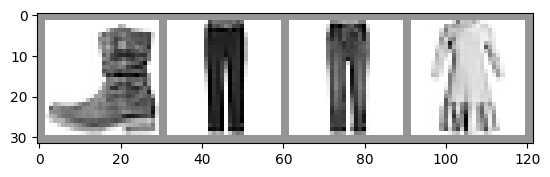

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

### <font color='red'>Define your network here</font>

In [13]:
import torch.nn as nn
import torch
import torch.nn.functional as F

import torch.nn.functional as F

class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)   # 28x28 -> 26x26
        self.conv2 = nn.Conv2d(6, 16, 3)  # 13x13 -> 11x11
        self.conv3 = nn.Conv2d(16, 32, 3) # 5x5 -> 3x3
        self.fc1 = nn.Linear(32*1*1, 64)  # Correct input size after conv+pool
        self.fc2 = nn.Linear(64, 10)      # 10 output classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


if torch.cuda.is_available() and use_cuda:
    model = GarmentClassifier().cuda()
else:
    model = GarmentClassifier()

### Prepare "trainer"

In [14]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        if torch.cuda.is_available() and use_cuda:
            inputs=inputs.cuda()
            labels=labels.cuda()

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

### Start training

In [15]:
# Initializing in a separate cell so we can easily add more epochs to the same run
torch.multiprocessing.set_sharing_strategy('file_system')
# timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 3

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number)

    # We don't need gradients on to do reporting
    model.train(False)

    running_vloss = 0.0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        if torch.cuda.is_available() and use_cuda:
            vinputs=vinputs.cuda()
            vlabels=vlabels.cuda()
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 2.016792552769184
  batch 2000 loss: 1.0290681665092707
  batch 3000 loss: 0.8587398227378726
  batch 4000 loss: 0.7680981637863442
  batch 5000 loss: 0.7198360490947961
  batch 6000 loss: 0.6681237770514563
  batch 7000 loss: 0.6476078577432781
  batch 8000 loss: 0.6245136447814293
  batch 9000 loss: 0.6235331304571591
  batch 10000 loss: 0.5884538082210347
  batch 11000 loss: 0.5765043837889098
  batch 12000 loss: 0.5872823964725249
  batch 13000 loss: 0.5684539013747126
  batch 14000 loss: 0.5443782282706816
  batch 15000 loss: 0.5576650295290164
LOSS train 0.5576650295290164 valid 0.5649501085281372
EPOCH 2:
  batch 1000 loss: 0.5452075157820946
  batch 2000 loss: 0.536152358344756
  batch 3000 loss: 0.5165181536773452
  batch 4000 loss: 0.5192681259982055
  batch 5000 loss: 0.5157536080637947
  batch 6000 loss: 0.497948883285746
  batch 7000 loss: 0.5186528207445518
  batch 8000 loss: 0.47651749940542504
  batch 9000 loss: 0.49375923043244985
  batch 10

### Verify results

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7e87a418e840>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1618, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py", line 1601, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

AssertionError: can only test a child process

Groundtruth: Ankle Boot  Pullover  Trouser  Trouser
Result:      Ankle Boot  Pullover  Trouser  Trouser


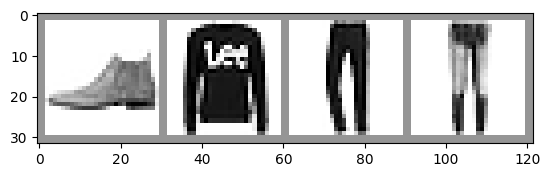

In [18]:
dataiter = iter(validation_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('Groundtruth: '+'  '.join(classes[labels[j]] for j in range(4)))
if torch.cuda.is_available() and use_cuda:
    images=images.cuda()
print('Result:      '+'  '.join([classes[i] for i in torch.argmax(model(images).cpu(),1)]))

# Q2.d (Extra credit: 10 points) Try to see if you can modify the network so that the validation loss is less than 0.3 and the number of parameters are no more than 5% more than the original one


# Q3. Object detection with YOLOv5

Please follow the instructions [here](https://pytorch.org/hub/ultralytics_yolov5/) to install YOLOv5 on PyTorch.



# Q3.a (10 points) Test YOLOv5s on one of your own photos. Show your code and results.

# Q3.b (Extra credit: 5 points) Combine YOLO and OpenCV to detect object from webcam stream by completing the code below (Hint: dir(model(frame)))

### <font color='red'>Complete the code below</font>

In [19]:
import cv2
import platform
import torch
from matplotlib import pyplot as plt

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
img = 'IMG_5155.jpeg'
results = model(img)
results.print()
results.show()

cap = cv2.VideoCapture(0)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = results.render()[0]

    cv2.imshow('YOLOv5 Webcam', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-4-28 Python-3.11.12 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 118MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


FileNotFoundError: [Errno 2] No such file or directory: 'IMG_5155.jpeg'